In [1]:
%pylab inline

import pandas as pd
from glob import glob
from sklearn.model_selection import train_test_split

from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
# To stop potential randomness
seed = 42
rng = np.random.RandomState(seed)

In [3]:
data = pd.read_csv('../datasets/age_prediction/age_prediction.csv')

In [4]:
data.head()

,image_names,age_labels
0,0.jpg,37
1,1.jpg,23
2,2.jpg,37
3,3.jpg,27
4,4.jpg,33


Age of this person is 48


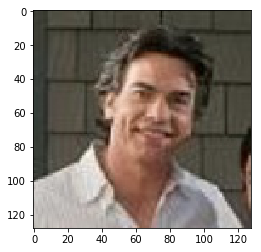

In [5]:
image_name = rng.choice(data.image_names)
plt.imshow(imread('../datasets/age_prediction/images/' + image_name))
print('Age of this person is', data.loc[data.image_names == image_name, 'age_labels'].values[0])

Age of this person is 29


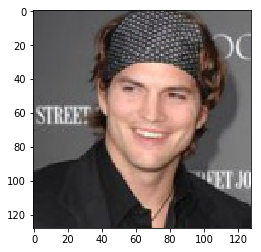

In [6]:
index = rng.choice(data.index)
plt.imshow(imread('../datasets/age_prediction/images/' + data.iloc[index].image_names))
print('Age of this person is', data.iloc[index].age_labels)

In [7]:
data = data[(data.age_labels > 20) & (data.age_labels < 50)]

In [8]:
images = []
for img in data.image_names:
    img = image.load_img('../datasets/age_prediction/images/' + img)
    img = image.img_to_array(img)
    images.append(img)
    
images=np.array(images)

In [9]:
images=preprocess_input(images, mode='tf')

In [10]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(128, 128, 3))

In [11]:
features = base_model.predict(images)

In [12]:
features.shape

(17591, 4, 4, 512)

In [13]:
features /= features.max()

In [14]:
train_x = features.reshape(17591,4*4*512)
train_y = data.age_labels.values

X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.3, random_state=42)

In [ ]:
model=Sequential()

model.add(Dense(1000, input_dim=8192, activation='relu'))

model.add(Dense(units=1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer="adam")

# fitting the model 
model.fit(X_train, Y_train, epochs=20, batch_size=128,validation_data=(X_valid,Y_valid))

Train on 12313 samples, validate on 5278 samples
Epoch 1/20
12313/12313 [==============================] - 2s 126us/step - loss: 145.7920 - val_loss: 60.1213
Epoch 2/20
12313/12313 [==============================] - 1s 90us/step - loss: 57.3957 - val_loss: 55.6692
Epoch 3/20
12313/12313 [==============================] - 1s 93us/step - loss: 54.0048 - val_loss: 54.9977
Epoch 4/20
12313/12313 [==============================] - 1s 92us/step - loss: 52.0762 - val_loss: 54.6028
Epoch 5/20
12313/12313 [==============================] - 1s 88us/step - loss: 50.4247 - val_loss: 54.3357
Epoch 6/20
12313/12313 [==============================] - 1s 87us/step - loss: 49.0849 - val_loss: 54.4180
Epoch 7/20
12313/12313 [==============================] - 1s 91us/step - loss: 48.3295 - val_loss: 54.7624
Epoch 8/20
12313/12313 [==============================] - 1s 93us/step - loss: 46.3519 - val_loss: 55.3164
Epoch 9/20
12313/12313 [==============================] - 1s 91us/step - loss: 45.6107 - val_

In [ ]:
predictions = model.predict(X_valid)
_, valid_images, _, _ = train_test_split(data.image_names,train_y,test_size=0.3, random_state=42)

In [ ]:
index = rng.choice(range(len(valid_images)))

image_name = valid_images.iloc[index]
plt.imshow(imread('../datasets/age_prediction/images/' + image_name))

print('Actual Age is', data.loc[data.image_names == image_name, 'age_labels'].values[0])
print('Predicted Age is', np.round(predictions[index][0]))